In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [2]:
from sklearn.datasets import make_circles
x,y = make_circles(n_samples=100,factor=0.5)
circles = pd.DataFrame(x,columns = ["x1", "x2"])
print(circles.shape)
print(circles.columns)

(100, 2)
Index(['x1', 'x2'], dtype='object')


In [3]:
np.unique(y)

array([0, 1], dtype=int64)

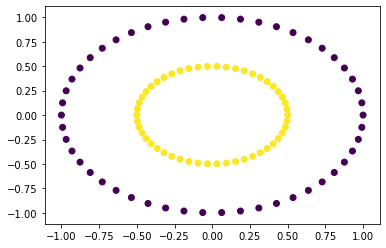

In [4]:
plt.scatter(circles.x1,circles.x2,
           c = y,
           cmap = 'viridis')
plt.show()

In [5]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'poly',degree=2,C=1.0, gamma=0.1)
SVM.fit(circles, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
print(len(SVM.support_vectors_))

100


In [6]:
X1_Min = circles.iloc[:, 0].min() - 0.25
X1_Max = circles.iloc[:, 0].max() + 0.25
X1_Range = np.arange(start = X1_Min, stop = X1_Max, step = 0.01)
X2_Min = circles.iloc[:, 1].min() - 0.25
X2_Max = circles.iloc[:, 1].max() + 0.25
X2_Range = np.arange(start = X2_Min, stop = X2_Max, step = 0.01)
X1, X2 = np.meshgrid(X1_Range,X2_Range)
print(X1.shape)
print(X2.shape)
X12 = np.array([X1.ravel(), X2.ravel()]).T
print(X12.shape)

(250, 250)
(250, 250)
(62500, 2)


In [7]:
Z = SVM.predict(X12).reshape(X1.shape)
print(Z.shape)

(250, 250)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


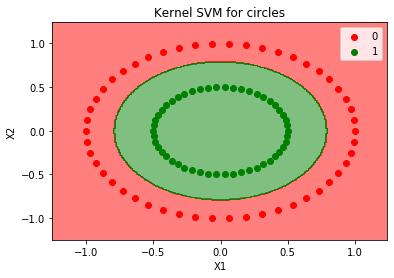

In [8]:
# Visualising the results
from matplotlib.colors import ListedColormap
plt.contourf(X1, X2, Z,
             alpha = 0.50,cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in np.unique(y):
    plt.scatter(circles.iloc[y == i, 0], circles.iloc[y == i, 1],
                c = ListedColormap(('red', 'green'))(i), label = i)
plt.title('Kernel SVM for circles')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [2]:
from sklearn.datasets import make_moons
x2,y2 = make_moons(n_samples=100)
print(type(x2))
print(type(y2))
moons = pd.DataFrame(x2,columns = ["x1", "x2"])
print(moons.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 2)


In [3]:
np.unique(y2)

array([0, 1], dtype=int64)

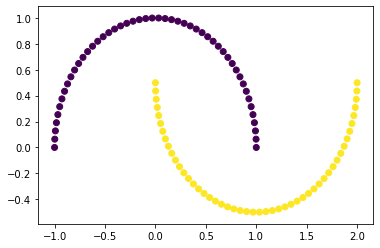

In [4]:
plt.scatter(moons.x1,moons.x2,
           c = y2,
           cmap = 'viridis')
plt.show()

In [14]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVM2 = SVC(kernel = 'rbf',degree=2, C=1.0, gamma=0.5)
SVM2.fit(moons, y2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
print(len(SVM2.support_vectors_))

36


In [16]:
X1_Min2 = moons.iloc[:, 0].min() - 0.25
X1_Max2 = moons.iloc[:, 0].max() + 0.25
X1_Range2 = np.arange(start = X1_Min2, stop = X1_Max2, step = 0.01)
X2_Min2 = moons.iloc[:, 1].min() - 0.25
X2_Max2 = moons.iloc[:, 1].max() + 0.25
X2_Range2 = np.arange(start = X2_Min2, stop = X2_Max2, step = 0.01)
X1, X2 = np.meshgrid(X1_Range2,X2_Range2)
print(X1.shape)
print(X2.shape)
X12 = np.array([X1.ravel(), X2.ravel()]).T
print(X12.shape)

(200, 350)
(200, 350)
(70000, 2)


In [17]:
Z2 = SVM2.predict(X12).reshape(X1.shape)
print(Z2.shape)

(200, 350)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


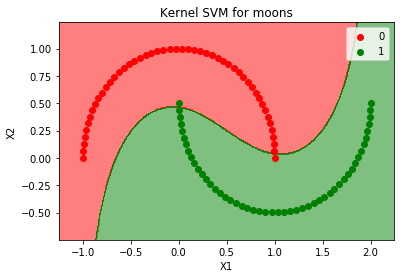

In [18]:
# Visualising the results
plt.contourf(X1, X2, Z2,
             alpha = 0.50,cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in np.unique(y2):
    plt.scatter(moons.iloc[y2 == i, 0], moons.iloc[y2 == i, 1],
                c = ListedColormap(('red', 'green'))(i), label = i)
plt.title('Kernel SVM for moons')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()